# Домашнее задание 3. Алгоритмы кластеризации

Основная задача этого задания -- реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Cчитываем данные, полученные в результате выполнения предыдущего домашнего задания, в `data frame` библиотеки `pandas`. Конвертируем данные в массив `numpy`.

In [2]:
data_df = pd.read_csv("hw2_out.csv", sep="\t", header=0, index_col="uid")
x = data_df.values
data_df
#x[:2][0]

,followers_count,friends_count,statuses_count,favourites_count,listed_count,created_year,name_words,screen_name_length,description_length
uid,,,,,,,,,
1392518336,2.876425e-04,0.002857,0.017522,0.013764,0.002457,0.7,0.125,0.666667,0.746479
361208576,1.524794e-04,0.001969,0.007125,0.002186,0.000626,0.5,0.250,0.416667,0.605634
1535215357,5.711965e-04,0.008314,0.170712,0.168889,0.001519,0.7,0.000,0.666667,0.107981
4396196375,2.994272e-04,0.003311,0.033525,0.051822,0.001675,0.9,0.000,0.833333,0.746479
17938477,8.032826e-05,0.001707,0.004966,0.015414,0.001251,0.2,0.250,1.000000,0.187793
720288026681716737,1.731627e-05,0.000239,0.008684,0.000071,0.001944,1.0,0.125,0.750000,0.403756
174004739,8.850539e-05,0.006413,0.051227,0.254653,0.000626,0.4,0.000,0.750000,0.000000
53783678,1.835044e-04,0.003690,0.035798,0.133637,0.001162,0.3,0.250,0.500000,0.568075
257662370,1.839854e-04,0.004700,0.017481,0.018042,0.000648,0.5,0.250,0.916667,0.413146


Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего логина на портале Техносферы. При проверке домашнего задания бадут осуществляться проверка логина и соответствующего алгоритма.

In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры  - epsilon, min_pts)", 
    u"OPTICS. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[hash("t.kosheleva") % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'OPTICS. (параметры - epsilon, min_pts)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [169]:
import math
class Point:
    def __init__(self, cord):
        self.cord = cord
        self.cd = None  # core distance
        self.rd = None  # reachability distance
        self.processed = False  # has this point been processed?
        self.idx = -1 # save data set's indexes
        
    def distance(self, p):  # distance between 2 points
        dist = 0.
        for i in xrange(len(p.cord)):
            dist += (p.cord[i] - self.cord[i]) ** 2
        return math.sqrt(dist)
     
    def getNeighbors(self, points, epsilon): # epsilon Neighbourhood of point 
        neigh = []
        for p in points:
            if not np.array_equal(p.cord, self.cord) and self.distance(p) <= epsilon:
                neigh.append(p)
        return neigh
    
    def core_dist(self, neighbors, min_pts):
        if self.cd is not None:
            return self.cd
        if len(neighbors) >= min_pts: #???
            sort_neighbors = sorted([self.distance(n) for n in neighbors]) # сортируем соседей по возрастанию расстояний до них
            self.cd = sort_neighbors[min_pts - 1] #???
            return self.cd
        return None;
        
class Clustering: 
    """
    Implement clustering algorithm according 
    """
    
    def __init__(self, epsilon, min_pts):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.epsilon = epsilon # the maximum radius to consider
        self.min_pts = min_pts # the number of points required to form a cluster
        return
        
    def fit(self, x, y):
        """
        Use data matrix x to compute model parameters
        """
        self.points = [Point(i) for i in x]
        i = 0
        for p in self.points:
            p.rd = None
            p.processed = False
            p.idx = i 
            i += 1
        self.unprocessed = [p for p in self.points] # список необработанных точек
        self.ordered = [] # список точек отсортированных по reachability distance
        self.clusters = [-1 for p in xrange(len(self.points))] # -1 для выбросов
        self.threshold = y # threshold - для формирования кластеров, threshold <= epsilon
        return self
    
    def processed(self, p):
        p.processed = True # отмечаем точку как обработанную
        self.unprocessed.pop(0)
        self.ordered.append(p) # добавляем точку в отсортированный список
        
    def insortRD(self, a, p):
        lo = 0
        hi = len(a)
        while lo < hi:
            mid = (lo+hi)//2
            if a[mid] < p.rd: lo = mid+1
            else: hi = mid
        a.insert(lo, p)
        
    def update(self, neighbors, point, seeds): # обновляем очередь
        for n in neighbors:
            if (not n.processed):
                new_rd = max(point.cd, point.distance(n))
                if (n.rd is None): # if n is not in seeds
                    n.rd = new_rd
                    self.insortRD(seeds, n)
                elif (new_rd < n.rd): # p in seeds, check for improvement
                    n.rd = new_rd

    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        number = 0
        while self.unprocessed:
            number += 1
            p = self.unprocessed[0] # берем произвольную точку
            point_neighbors = p.getNeighbors(self.points, self.epsilon) # считаем соседей
            p.cd = p.core_dist(point_neighbors, self.min_pts)
            self.processed(p) # mark as processed
            if p.cd is not None: # if p has a core_distance form empty priority queue
                seeds = []
                self.update(point_neighbors, p, seeds) 
                while seeds:
                    
                    #seeds.sort(key = lambda n: n.rd) #сортируем очередь по reachability distance
                    n = seeds.pop(0) # удаляем и берем первый элемент из очереди
                    n_neighbors = n.getNeighbors(self.points, self.epsilon) #считаем для этой точки соседей
                    n.cd = n.core_dist(n_neighbors, self.min_pts)
                    self.processed(n) 
                    if n.cd is not None: 
                        self.update(n_neighbors, n, seeds)
                    number += 1
                    if number & 127 == 0:
                        print(number)
        clust_amt = -1               
        for i in xrange(len(self.ordered)):
            point = self.ordered[i]
            if point.rd is None: 
                point.rd = float('infinity')
            if point.cd is None: 
                point.cd = float('infinity')
            if point.rd <= self.threshold:
                self.clusters[point.idx] = clust_amt
            elif point.cd <= self.threshold:
                    clust_amt += 1
                    self.clusters[point.idx] = clust_amt
            #print point.rd
        #return [i.rd for i in self.ordered] # возвращаем отсортированнный по reachability distance список
        return self.clusters # возвращаем список с номерами кластеров для наших точек
        #return [random.randint(0,1) for r in xrange(self.x_len)]
    
    def fit_predict(self, x, y):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

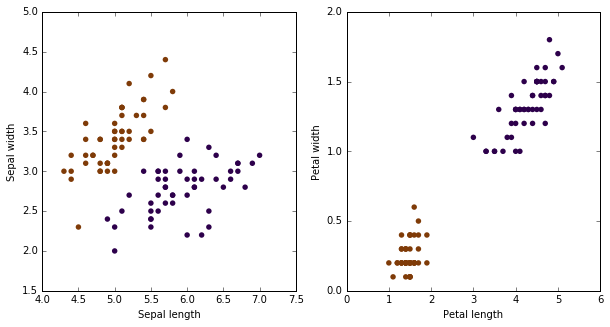

In [136]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]
pl.figure(figsize=(10, 5))
#print y_iris
pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [199]:
pred_iris = Clustering(1, 3).fit_predict(x_iris, 0.8)
#pred_iris
#pl.hist(xrange(len(pred_iris)), weights = pred_iris, bins = len(pred_iris), histtype = 'bar') # строим график по reachability distance для определеня threshold
#plt.ylim((0,0.8))
#plt.xlim((0, len(x)))
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [206]:
"""Sihouette"""
def quality(x, y): # x -- dataset, y -- cluster's indexes for x
    """
    Implement quality criterion of your choice
    """
    clusters_amt = max(y) + 1 # количество кластеров (индексация кластеров с 0)
    elem_amt = {} # номер кластера: количество элементов в этом кластере
    for clust in y: # заполняем словарь
        if clust in elem_amt:
            elem_amt[clust] += 1
        else:
            elem_amt[clust] = 1
    print elem_amt
    # введем 2 метрицы размера (len(y) * clusters_amt), то есть столбцы - кластеры, строки - элементы(точки) в dataset
    # a_ij - сумма расстояний от объекта j до элементов из кластера i (объект лежит в этом кластере)
    # b_ij - сумма расстояний от объекта j до элементов из кластера i (объект НЕ лежит в этом кластере)
    a = [[0. for r in xrange(clusters_amt)] for p in xrange(len(x))] # столбцы, строки
    b = [[0. for r in xrange(clusters_amt)] for p in xrange(len(x))]
    for i in xrange(len(x)):
        if i & 127 == 0:
            print i
        if y[i] != -1: # если точка не является выбросом
            for j in xrange(len(x)):
                if y[j] != -1:
                    if y[i] == y[j] and y[j] != -1: # если точки i, j в одном кластере, то заполняем a
                        a[i][y[i]] += np.linalg.norm(x[i] - x[j])
                    else: # если точки i, j в разных кластерах, то заполняем b
                        b[i][y[j]] += np.linalg.norm(x[i] - x[j])
    # a_i - среднее расстояние от объекта i из кластера j до объектов из кластера j
    # b_i - среднее расстояние от объекта i до объектов из другого кластера j
    #print a
    a1 = [0 for i in xrange(len(x))]
    b1 = [0 for i in xrange(len(x))]
    silhouette = [0 for i in xrange(len(x))]
    for i in xrange(len(x)):
        if y[i] != -1 and elem_amt[y[i]] != 1:
            a1[i] = a[i][y[i]] / (elem_amt[y[i]] - 1)
            for j in xrange(clusters_amt):
                b[i][j] /= elem_amt[j]
                b1[i] = min([x for x in b[i] if x != 0.]) 
            silhouette[i] = (b1[i] - a1[i]) / max(a1[i], b1[i])
        #print silhouette[i]
    return np.mean(silhouette)

#print quality(x_iris, pred_iris) 
print quality(x, rd)

{0: 1260, 1: 3714, 2: 3842, 3: 1424, 4: 599, -1: 359}
0
128
256
384
512
640
768
896
1024
1152
1280
1408
1536
1664
1792
1920
2048
2176
2304
2432
2560
2688
2816
2944
3072
3200
3328
3456
3584
3712
3840
3968
4096
4224
4352
4480
4608
4736
4864
4992
5120
5248
5376
5504
5632
5760
5888
6016
6144
6272
6400
6528
6656
6784
6912
7040
7168
7296
7424
7552
7680
7808
7936
8064
8192
8320
8448
8576
8704
8832
8960
9088
9216
9344
9472
9600
9728
9856
9984
10112
10240
10368
10496
10624
10752
10880
11008
11136
-0.00289072015635


Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

In [ ]:
ks = range(1, 21)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = Clustering()
    y = cls.fit_predict(x)
    criteria[i] = quality(x, y)
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

In [ ]:
#rd = Clustering(0.15, 3).fit_predict(x, 0.14) # clust = 5?, qual = -0.000777851868437
#rd = Clustering(0.14, 3).fit_predict(x, 0.13) # clust = 20, qual = -0.159490279788
#rd = Clustering(0.148, 3).fit_predict(x, 0.138) # clust = 4, qual = 0.00539819868249
#rd = Clustering(0.146, 3).fit_predict(x, 0.137) # clust = 4, qual = 0.00792785227315
#rd = Clustering(0.144, 3).fit_predict(x, 0.136)# clust = 5, qual = -0.00289072015635
#pl.hist(xrange(len(rd)), weights = rd, bins = len(rd), histtype = 'bar') # строим график по reachability distance для определеня threshold
#plt.ylim((0,0.8)) 

Далее необходимо кластеризовать данные, используя выбранное количество кластеров, и визуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время. 

In [207]:
#k = 5
cls = Clustering(0.146, 3)
y = cls.fit_predict(x, 0.137)

128
256
384
512
640
768
896
1024
1152
1280
1408
1536
1664
1792
1920
2048
2176
2304
2432
2560
2688
2816
2944
3072
3200
3328
3456
3584
3712
3840
3968
4096
4224
4352
4480
4608
4736
4864
4992
5120
5248
5376
5504
5632
5760
5888
6016
6144
6272
6400
6528
6656
6784
6912
7040
7168
7296
7424
7552
7680
7808
7936
8064
8192
8320
8448
8576
8704
8832
8960
9088
9216
9344
9472
9600
9728
9856
9984
10112
10240
10368
10496
10624
10752
10880


Визуализируем результаты кластеризации ([подсказка](http://anokhin.github.io/img/hw3_tsne-kmeans.png)). Можно ли сказать, что в двумерном пространстве объекты из одного кластера находятся недалеко? Какой вывод можно сделать о качестве кластеризации?

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 11198
[t-SNE] Computed conditional probabilities for sample 2000 / 11198
[t-SNE] Computed conditional probabilities for sample 3000 / 11198
[t-SNE] Computed conditional probabilities for sample 4000 / 11198
[t-SNE] Computed conditional probabilities for sample 5000 / 11198
[t-SNE] Computed conditional probabilities for sample 6000 / 11198
[t-SNE] Computed conditional probabilities for sample 7000 / 11198
[t-SNE] Computed conditional probabilities for sample 8000 / 11198
[t-SNE] Computed conditional probabilities for sample 9000 / 11198
[t-SNE] Computed conditional probabilities for sample 10000 / 11198
[t-SNE] Computed conditional probabilities for sample 11000 / 11198
[t-SNE] Computed conditional probabilities for sample 11198 / 11198
[t-SNE] Mean sigma: 0.061272
[t-SNE] Error after 100 iterations with early exaggeration: 1.431662
[t-SNE] Error

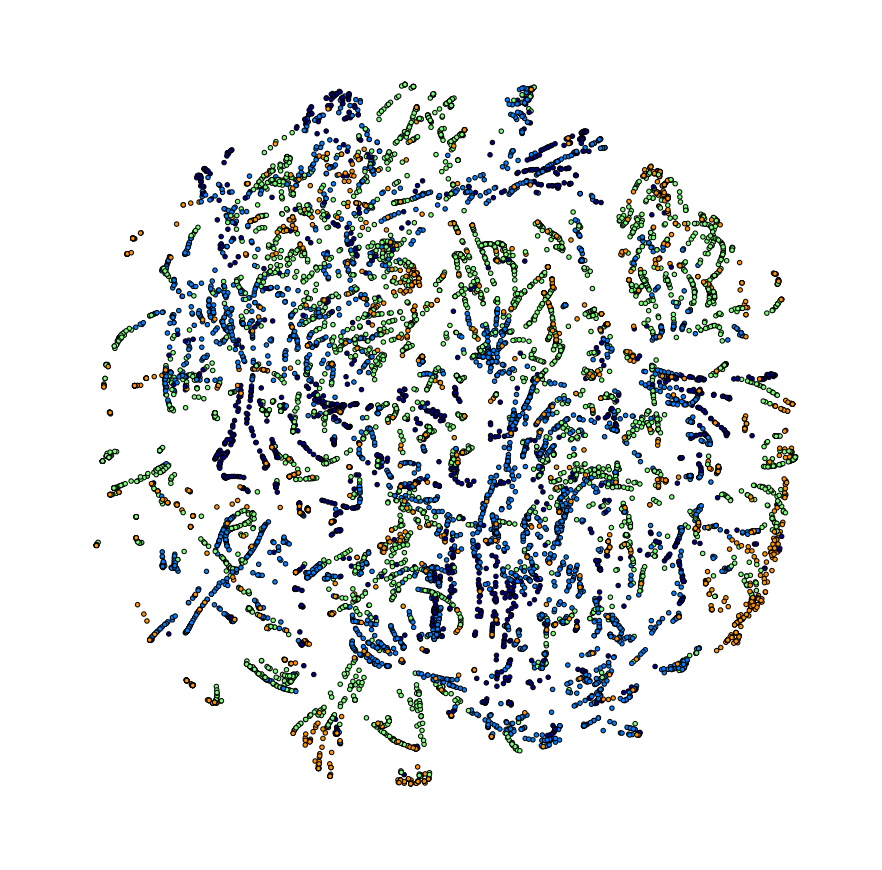

In [208]:
k = 4
tsne = sm.TSNE(n_components=2, verbose=1, n_iter=1000)
z = tsne.fit_transform(x)

# Color map
cm = pl.get_cmap('jet')
pl.figure(figsize=(15, 15))
pl.scatter(z[:, 0], z[:, 1], c=map(lambda c: cm(1.0 * c / k), y))
pl.axis('off')
pl.show()

Попробуем проанализировать полученные кластеры. Для того, чтобы интерпретировать "суть" каждого из кластеров, построим [radar plot](http://www.wikiwand.com/en/Radar_chart), отображающий их центроиды. Посмотрите на графики и попробуйте объяснить, каким поведением можно охарактеризовать каждый из полученных кластеров? Есть ли среди кластеров похожие?

Реализация радара позаимствована отсюда: 
http://www.science-emergence.com/Matplotlib/MatplotlibGallery/RadarChartMatplotlibRougier/

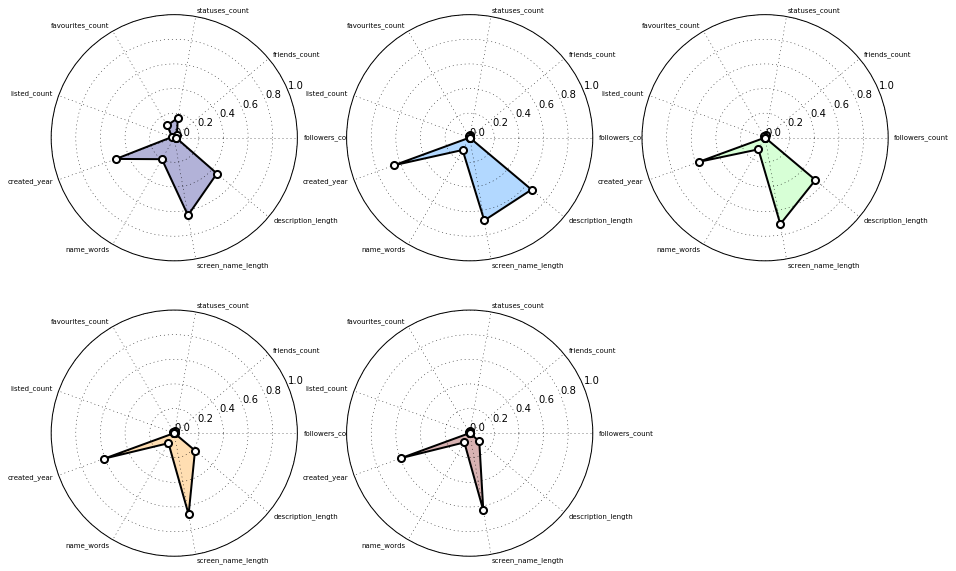

In [211]:
def radar(centroid, features, axes, color):
    # Set ticks to the number of features (in radians)
    t = np.arange(0, 2*np.pi, 2*np.pi/len(features))
    plt.xticks(t, [])

    # Set yticks from 0 to 1
    plt.yticks(np.linspace(0, 1, 6))

    # Draw polygon representing centroid
    points = [(x, y) for x, y in zip(t, centroid)]
    points.append(points[0])
    points = np.array(points)
    codes = [path.Path.MOVETO,] + [path.Path.LINETO,] * (len(centroid) - 1) + [ path.Path.CLOSEPOLY ]
    _path = path.Path(points, codes)
    _patch = patches.PathPatch(_path, fill=True, color=color, linewidth=0, alpha=.3)
    axes.add_patch(_patch)
    _patch = patches.PathPatch(_path, fill=False, linewidth = 2)
    axes.add_patch(_patch)

    # Draw circles at value points
    plt.scatter(points[:,0], points[:,1], linewidth=2, s=50, color='white', edgecolor='black', zorder=10)

    # Set axes limits
    plt.ylim(0, 1)

    # Draw ytick labels to make sure they fit properly
    for i in range(len(features)):
        angle_rad = i/float(len(features))*2*np.pi
        angle_deg = i/float(len(features))*360
        ha = "right"
        if angle_rad < np.pi/2 or angle_rad > 3*np.pi/2: ha = "left"
        plt.text(angle_rad, 1.05, features[i], size=7, horizontalalignment=ha, verticalalignment="center")

# Some additiola imports
import matplotlib
import matplotlib.path as path
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Choose some nice colors
matplotlib.rc('axes', facecolor = 'white')
# Make figure background the same colors as axes 
fig = plt.figure(figsize=(15, 15), facecolor='white')

cm = pl.get_cmap('jet')

clusters = np.unique(y)
for j, cluster in enumerate(clusters):    
    x_c = x[y == cluster]
    centroid = x_c.mean(axis=0)    
    # Use a polar axes
    axes = plt.subplot(3, 3, j + 1, polar=True)
    radar(centroid, data_df.columns.values, axes, cm(1.0 * j / k))

plt.show()

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.